In [18]:
# Import the libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
from sklearn import linear_model

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8) #adjust the parameters for the plots.

In [2]:
#Read in the data.

df = pd.read_csv("movies.csv")

In [3]:
# Let's look at the data.
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Let's see if we have missing data, we can do that with a loop.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{}-{}%".format(col, pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
#Let's look at the datatypes of our colums:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#Float may not be ideal because we mostly have .0 in the end of our data, but we need to have float64 so we can use some functions latter.

In [6]:
# Some of the values in the column year are different than the ones in the released column.
# That may be because movies are stored for some time before being released, so, while that data may be incorrect
# We would want to have the same value in both tables
# We ccan't remove the data assuming that these are mistakes, so we leave it as it is.


# df["year_release"] = df["released"].astype(string).str[0:4]


In [7]:
# Let's see the gross revenue for these movies.
df.sort_values(by=["gross"], inplace = False, ascending = False )

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [8]:
# We want to study the gross revenue and relations with other tables, so the ones with Not a Number
# Should be removed, because these don't have relevant information for our project.
df = df[np.isfinite(df["gross"])]
    

In [9]:
df.sort_values(by=["gross"], inplace = False, ascending = False )


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,NaN,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,NaN,7.900000e+02,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,NaN,6.820000e+02,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


In [10]:
#We also need to know the buget if we can, so we remove the NaN values from that column:
df = df[np.isfinite(df["budget"])]
df.sort_values(by=["gross"], inplace = False, ascending = False )

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


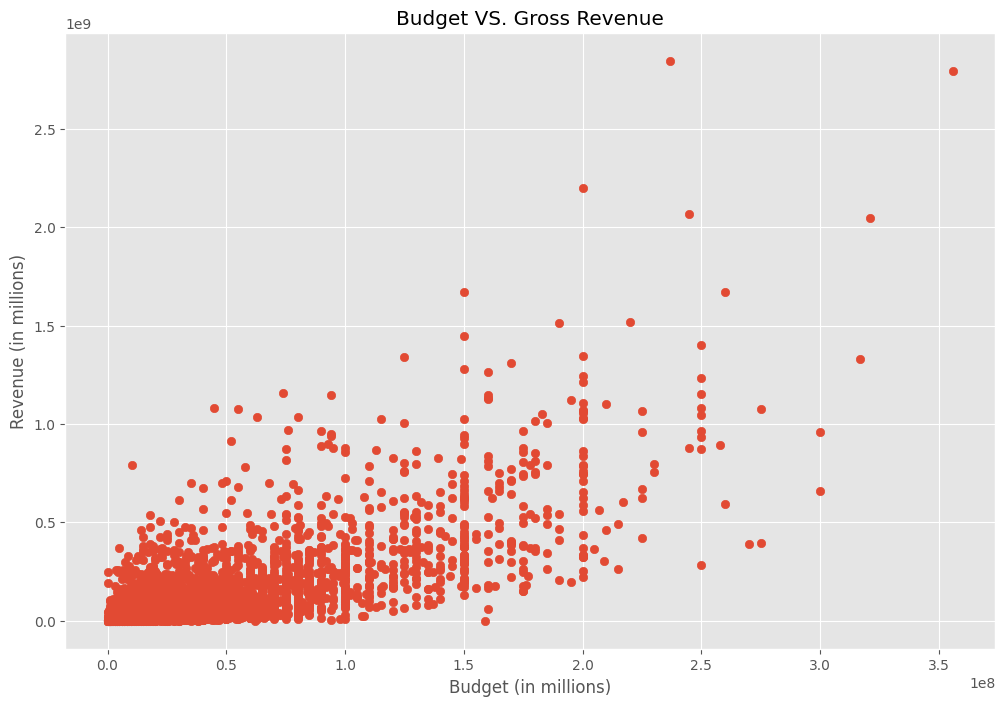

In [12]:
# We want to study correlations with the gross revenue.
# We assume the columns we need to look to are the budget and the company.
# Let's do a plot of budget vs gross revenue.

plt.scatter(x = df["budget"], y = df["gross"])
plt.title("Budget VS. Gross Revenue")
plt.xlabel("Budget (in millions)")
plt.ylabel("Revenue (in millions)")
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

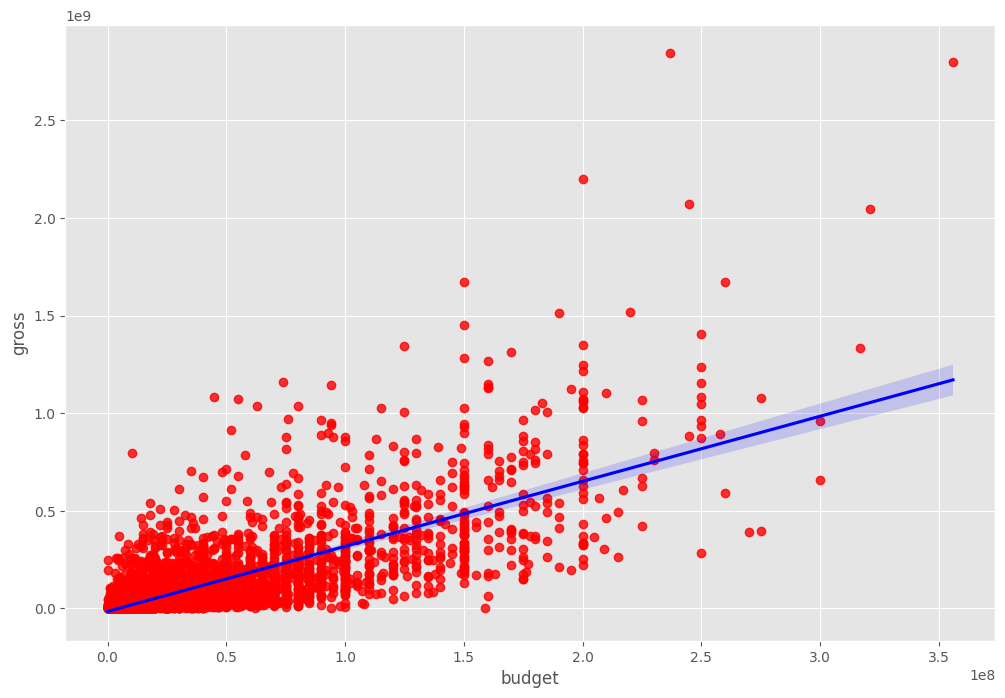

In [13]:
#Plot the budget vs gross, this time using seaborn.
sns.regplot(x = "budget", y= "gross", data  = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [14]:
#Let's look at correlations.
df.corr(method  = "spearman") #pearson (default), kendall, spearman
#correlations closer to 1 mean that we may have some kind of linear relation between two values.
# Here we can see two interesting correlations, "gross and budget" and "gross and votes"

C:\Users\facun\AppData\Local\Temp\ipykernel_5284\1246209321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method  = "spearman") #pearson (default), kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000


C:\Users\facun\AppData\Local\Temp\ipykernel_5284\4014824313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


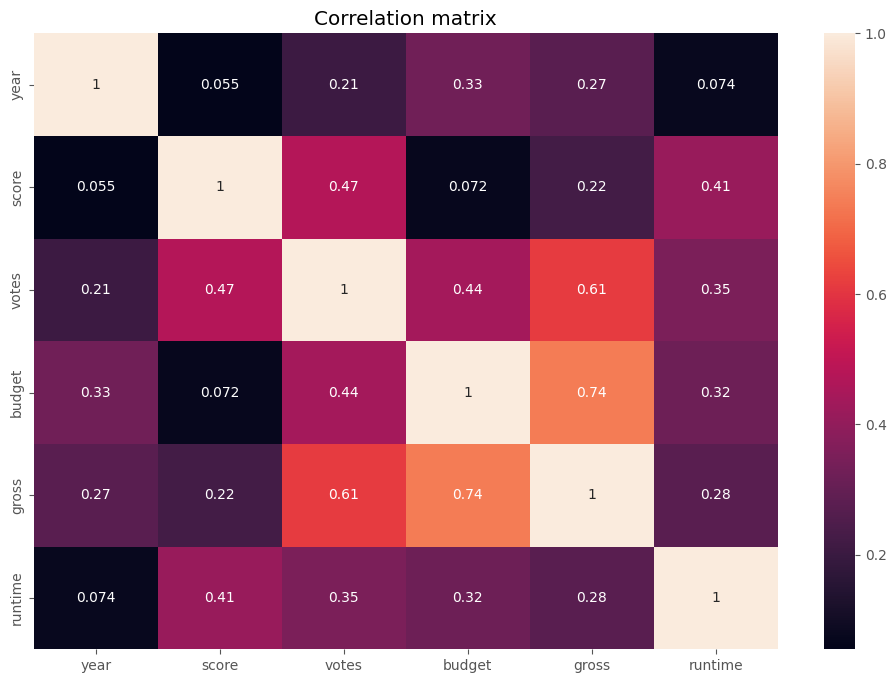

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True) #Annot = True is used so the correlation value appears in the graph.

plt.title("Correlation matrix")
plt.show()




In [16]:
# Now we also would want to look correlations with the other columns.
# To do so, we numerize them.
df_numerized = df

for col_name in df_numerized:
    if (df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] =  df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000.0,46998772.0,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000.0,58853106.0,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000.0,538375067.0,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000.0,83453539.0,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000.0,39846344.0,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000.0,426505244.0,454,124.0
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000.0,319715683.0,1114,99.0
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000.0,245487753.0,1403,101.0
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000.0,111105497.0,12,100.0


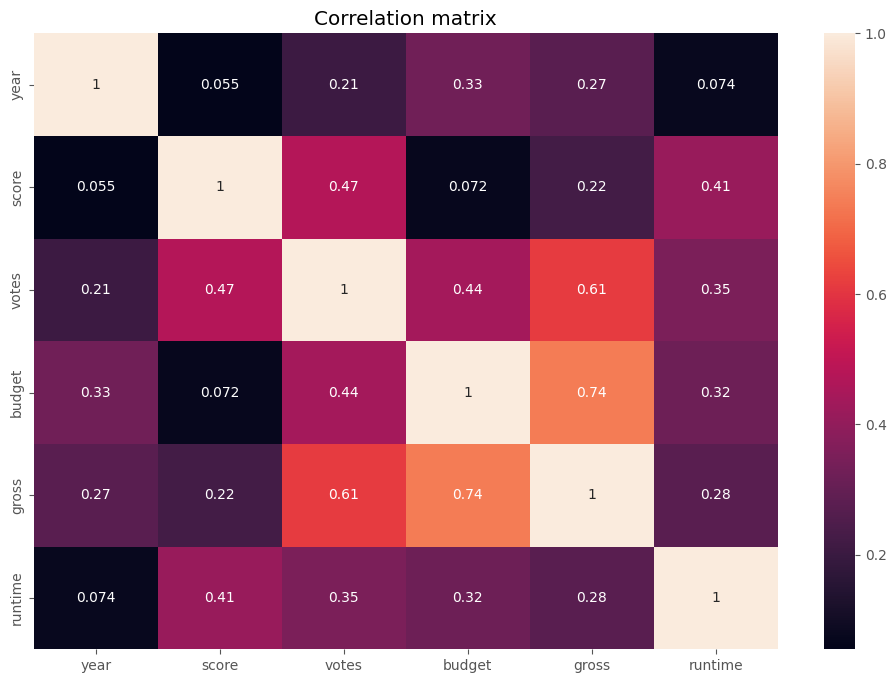

In [25]:
#Now let's look at the correlation here
correlation_matrix_2 = df_numerized.corr()
sns.heatmap(correlation_matrix, annot = True) #Annot = True is used so the correlation value appears in the graph.

plt.title("Correlation matrix")
plt.show()

#We know that there is a problem finding correlations because we can't quantify the "genre"
#There is not a comparable change between genre = 4 --> 5, and genre = 5 -->6
# While the numeric change is the same one, the actual change is not comparable.

In [26]:
#Let's unstack that.
corr_pairs = correlation_matrix_2.unstack()
corr_pairs


name     name        1.000000
         rating     -0.023013
         genre       0.009617
         year        0.024435
         released   -0.005896
                       ...   
runtime  country    -0.033554
         budget      0.318595
         gross       0.275596
         company     0.038752
         runtime     1.000000
Length: 225, dtype: float64

In [27]:
#Let's find the high correlations:
sorted_values = corr_pairs.sort_values() 
high_corr = sorted_values[(sorted_values) > 0.5]
high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [21]:
#To end, let's do a linear regression of Gross Revenue vs Budget and Votes.

reg = linear_model.LinearRegression()
reg.fit(df[["votes", "budget"]], df.gross)

LinearRegression()

In [24]:
reg.coef_
reg.intercept_

-33135390.8449073

In [ ]:
# So a linear model can be written as.
# g = 364.13822987*v + 2.62381524*b - 33135390.8449073
# Where g = gross, b = budget, v = votes.

#Let's define that as a function:

def function(v, b):
    g = 364.13822987*v + 2.62381524*b - 33135390.8449073
    return g

# Now we can predict the gross earnings that a movie will have if we know the initial budget and the number of votes.
